# Libraries

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing  import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error

from pprint import pprint
import plotly.graph_objs as go
from plotly.offline import iplot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import model_selection


import warnings
warnings.filterwarnings('ignore')

# Data loading and info

In [44]:
main_path = r'/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv'
main_df = pd.read_csv(main_path)
main_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
main_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [46]:
main_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [47]:
main_df.shape

(1599, 12)

In [48]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Data split

In [49]:
x = main_df.drop('quality',axis=1)
y = main_df[['quality']]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [50]:
## split the data into train and test

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,
                                                                   test_size=0.2,
                                                                   random_state=143)
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1279 entries, 80 to 590
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
dtypes: float64(11)
memory usage: 119.9 KB


In [51]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1279 entries, 80 to 590
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quality  1279 non-null   int64
dtypes: int64(1)
memory usage: 20.0 KB


# Data processing

In [52]:
# Applying Standard sccaling  to get optmized result

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train

array([[-1.23649814, -0.42916733, -0.36267612, ...,  0.66054638,
        -0.5674515 , -1.16013023],
       [-0.71682491,  0.01960529, -1.02701631, ..., -0.1237694 ,
         0.01043724,  0.36260116],
       [ 1.24638507, -1.60719547,  1.01710735, ..., -1.03880449,
         1.39737021,  0.55294258],
       ...,
       [-0.60134197,  1.16958514, -1.38473795, ...,  0.66054638,
        -0.336296  , -0.96978881],
       [-0.48585903,  0.41228134, -1.23142868, ...,  0.26838849,
        -0.68302925, -0.30359383],
       [ 0.38026302, -0.42916733,  1.11931353, ...,  0.26838849,
        -0.50966263, -0.68427667]])

# Data visualization

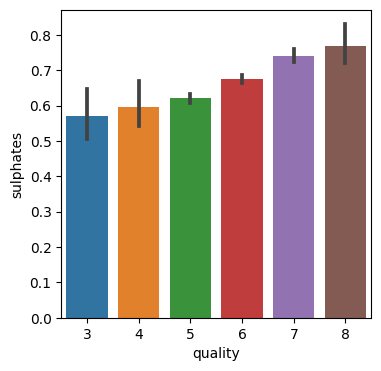

In [53]:
fig = plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='sulphates',data=main_df)
plt.show()

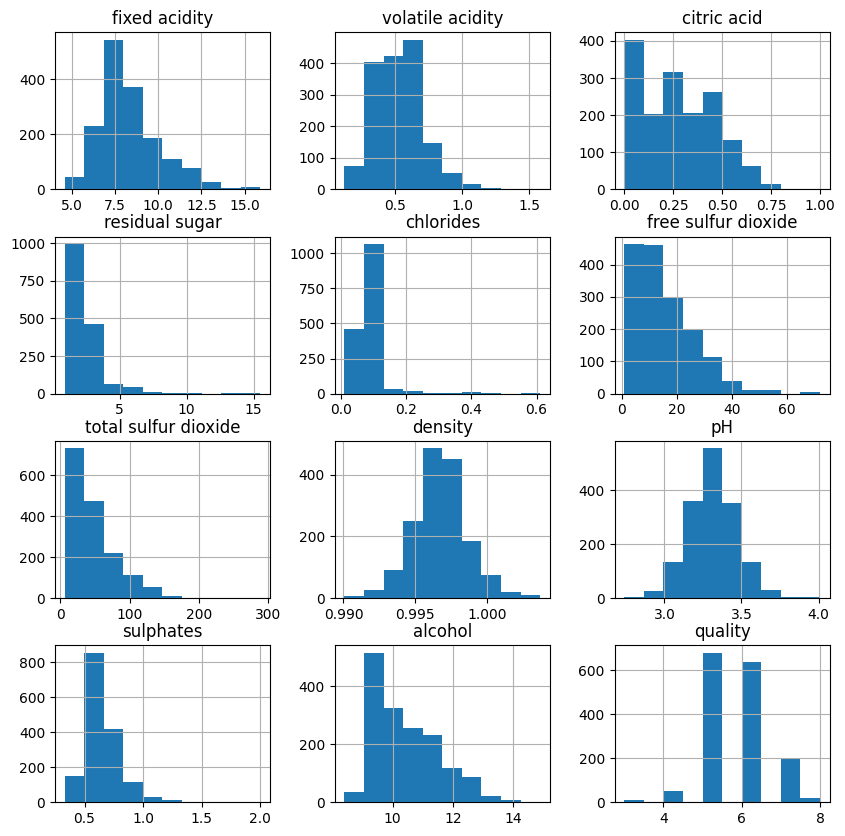

In [54]:
main_df.hist(bins=10, figsize=(10,10))
plt.show()

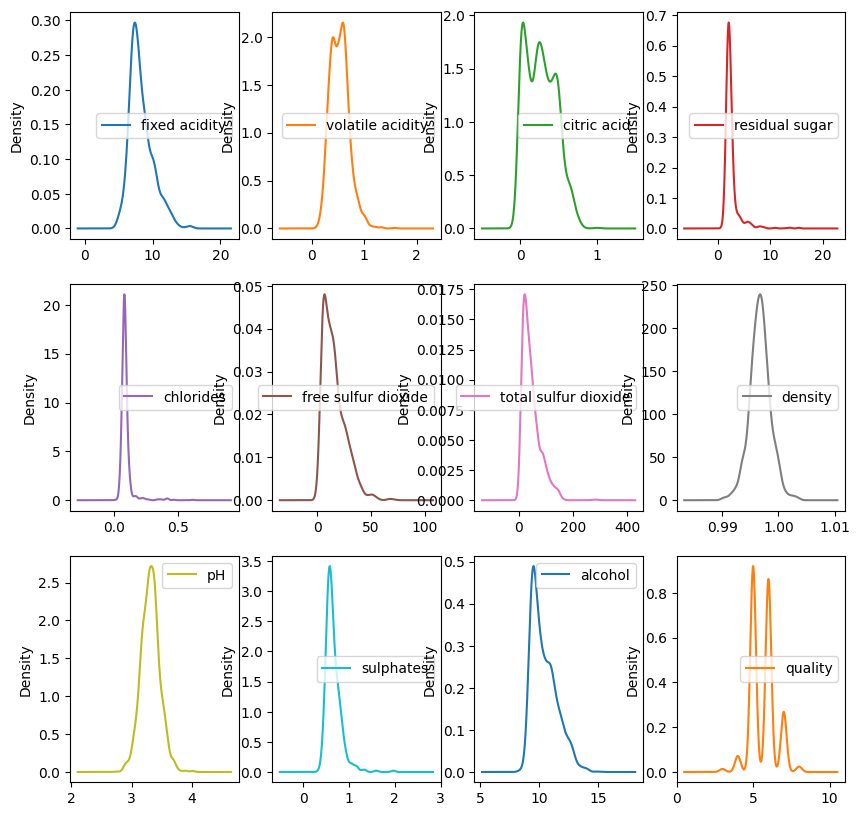

In [55]:
## density plot

main_df.plot(kind='density', subplots=True, layout=(3,4), sharex=False,figsize=(10,10))
plt.show()

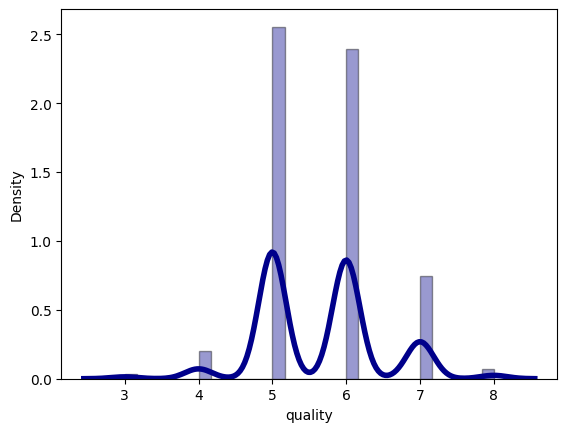

In [56]:
sns.distplot(main_df['quality'], hist=True, kde=True,
           bins='auto', color='darkblue',
           hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4}
           
           )
plt.show()

# Columns

In [63]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [64]:
# create pivot table

df_pivot_table = main_df.pivot_table(columns,
                                    ['quality'],
                                    aggfunc='median')
print(df_pivot_table)

         alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                             
3          9.925     0.0905        0.035  0.997565           7.50   
4         10.000     0.0800        0.090  0.996500           7.50   
5          9.700     0.0810        0.230  0.997000           7.80   
6         10.500     0.0780        0.260  0.996560           7.90   
7         11.500     0.0730        0.400  0.995770           8.80   
8         12.150     0.0705        0.420  0.994940           8.25   

         free sulfur dioxide    pH  residual sugar  sulphates  \
quality                                                         
3                        6.0  3.39             2.1      0.545   
4                       11.0  3.37             2.1      0.560   
5                       15.0  3.30             2.2      0.580   
6                       14.0  3.32             2.2      0.640   
7                       11.0  3.28             2.3      0

In [65]:
## correleation matrix

corr_matrix = main_df.corr()
print(corr_matrix['quality'].sort_values(ascending=False))

## when the correlation is close to 1 it means the two variables 
## are strongly positive correlated
## vice versa for -1, strong neg corr and 0 is no linear relation exists



quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


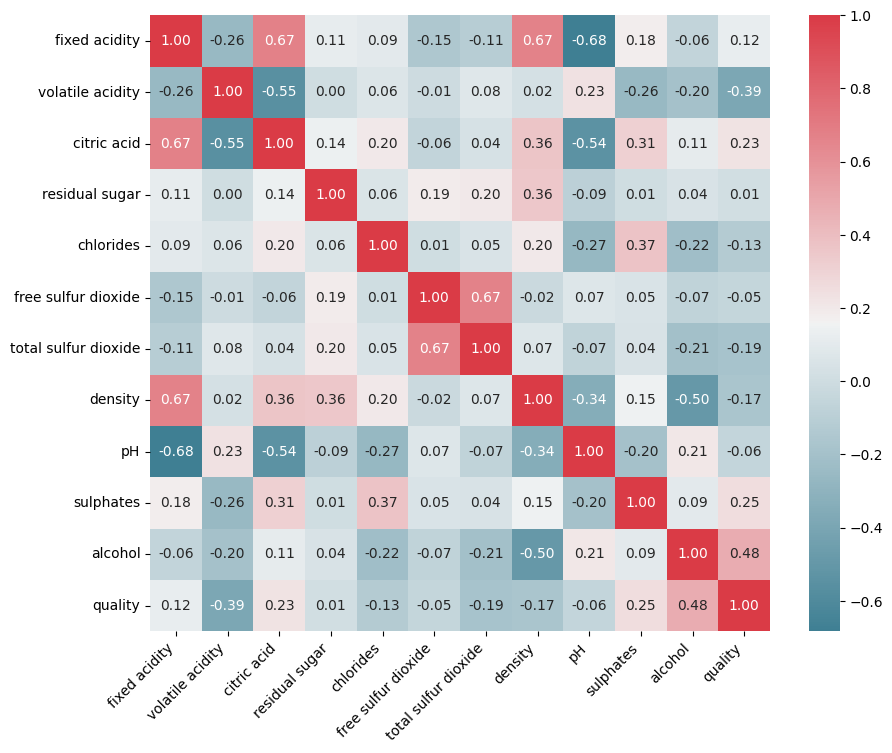

In [67]:
## correleation plot
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr_matrix, cmap=colormap,
           annot=True, fmt='.2f')
ax.set_xticklabels(
    columns,
    rotation=45,
    horizontalalignment='right'
    )

ax.set_yticklabels(columns)
plt.show()
                                 

In [ ]:
# Scatterplot matrix

sm = scatter_matrix(main_df, figsize=(10,10), diagonal='kde')

#change label rotation
